# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Sindi Aprilianti
- **Email:** apriliantisindi29@gmail.com
- **ID Dicoding:** Sindi Aprilianti

## Menentukan Pertanyaan Bisnis

- Pada season apa terjadi penyewaan sepeda paling banyak dan paling sedikit?
- Pada pukul berapa paling banyak dan paling sedikit terjadi penyewaan sepeda?
- Bagaimana perbandingan jumlah penyewaan sepeda pada tahun 2012 dan 2012?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Akses dataset yang akan digunakan, yaitu dataset hour dan day

In [2]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

Melihat informasi dari setiap DataFrame

In [4]:
# Dataframe hour
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
# Dataframe day
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Hasil:
- Beberapa nama kolom disingkat, sehingga lebih baik diubah agar lebih mudah dibaca
- Tipe data untuk dteday berupa object, bukan datetime.
- Tipe data untuk season berupa int64, sebaiknya diubah menjadi category karena season hanya ada 4 macam, yaitu Spring, Summer, Fall, dan Winter.
- Tipe data untuk year berupa int64, namun karena tahun yang terdapat pada dataset hanya 2011 dan 2012, maka sebaiknya diubah menjadi category.
- Tipe data untuk month diubah menjadi category.

Melihat apakah ada missing valued dalam DataFrame

In [6]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Hasil: Tidak terdapat missing value dalam DataFrame hour

In [7]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Hasil: Tidak terdapat missing value dalam DataFrame day

Melakukan pengecekan apakah ada duplikasi dalam DataFrame hour dan day

In [8]:
print("jumlah duplikasi: ", hour_df.duplicated().sum())
print("jumlah duplikasi: ", day_df.duplicated().sum())

jumlah duplikasi:  0
jumlah duplikasi:  0


Hasil: Terlihat bahwa tidak ada data duplicate dalam DataFrame

Memeriksa parameter statistik terhadap semua kolom numerik dalam Dataframe hour

In [9]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Memeriksa parameter statistik terhadap semua kolom numerik dalam DataFrame day

In [10]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

Mengganti nama kolom yang sebelumnya disingkat

In [11]:
hour_df.rename(
    columns={
        'dteday': 'dateday',
        'yr': 'year',
        'mnth': 'month',
        'hr': 'hour',
        'hum': 'humidity',
        'cnt': 'count'
    }, inplace=True
)
hour_df.head()

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [12]:
day_df.rename(
    columns={
        'dteday': 'dateday',
        'yr': 'year',
        'mnth': 'month',
        'hr': 'hour',
        'hum': 'humidity',
        'cnt': 'count'
    }, inplace=True
)
day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengganti tipe data kolom dateday, dari object menjadi datetime

In [13]:
hour_df['dateday'] = pd.to_datetime(hour_df['dateday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dateday     17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   year        17379 non-null  int64         
 4   month       17379 non-null  int64         
 5   hour        17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  humidity    17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  count       17379 non-

In [14]:
day_df['dateday'] = pd.to_datetime(day_df['dateday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dateday     731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   year        731 non-null    int64         
 4   month       731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  humidity    731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  count       731 non-null    int64         
dtypes: datetime64[ns](1), floa

Mengganti tipe data untuk season dan year dari int64 menjadi category

In [15]:
columns = ['season', 'year']
for column in columns:
    hour_df[column] = hour_df[column].astype('category')
    day_df[column] = day_df[column].astype('category')
hour_df.info()
hour_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dateday     17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   year        17379 non-null  category      
 4   month       17379 non-null  int64         
 5   hour        17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  humidity    17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  count       17379 non-

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Mengubah isi kolom season menjadi 1. Spring, 2. Summer, 3. Fall, 4. Winter

In [16]:
hour_df['season'] = hour_df['season'].map({
    1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'
})

hour_df.head()

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,spring,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,spring,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [17]:
day_df['season'] = day_df['season'].map({
    1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'
})

day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,spring,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


mengubah isi kolom year menjadi 2011 dan 2012

In [18]:
hour_df['year'] = hour_df['year'].map({
    0: '2011', 1: '2012'
})

hour_df.head()

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,spring,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,spring,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,spring,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,spring,2011,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,spring,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [19]:
day_df['year'] = day_df['year'].map({
    0: '2011', 1: '2012'
})

day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,spring,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengubah isi kolom month menjadi jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec.

In [20]:
hour_df['month'] = hour_df['month'].map({
    1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec'
})

hour_df.head()

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,spring,2011,jan,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,spring,2011,jan,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,spring,2011,jan,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,spring,2011,jan,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,spring,2011,jan,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [21]:
day_df['month'] = day_df['month'].map({
    1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec'
})

day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,spring,2011,jan,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,2011,jan,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,2011,jan,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,2011,jan,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,2011,jan,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore data hour_df

In [22]:
hour_df.describe(include="all")

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,fall,2012,may,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734,1488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [40]:
hour_df.to_csv("hour_fix_df.csv", index=False)

Didapatkan hasil bahwa terdapat 17.379 penyewa sepeda. Dengan rata-rata menyewa pada pukul 11.54.

Melihat waktu dengan penyewa sepeda terbanyak

In [23]:
hour_count = hour_df.groupby(by="hour", observed=False)['count'].sum().reset_index().sort_values(by="count", ascending=False)
print(hour_count)

    hour   count
17    17  336860
18    18  309772
8      8  261001
16    16  227748
19    19  226789
13    13  184919
12    12  184414
15    15  183149
14    14  175652
20    20  164550
9      9  159438
7      7  154171
11    11  151320
10    10  126257
21    21  125445
22    22   95612
23    23   63941
6      6   55132
0      0   39130
1      1   24164
2      2   16352
5      5   14261
3      3    8174
4      4    4428


Dari data diketahui bahwa paling banyak penyewa sepeda pada pukul 17 atau 5 sore.

### Explore data day_df

In [24]:
day_df.describe(include="all")

,instant,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
count,731.000000,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,fall,2012,jan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [39]:
day_df.to_csv("day_fix_df.csv", index=False)

Dari Top terlihat bahwa paling banyak penyewa sepeda berada pada season Fall di January 2011.

Melihat jumlah penyewa sepeda pada setiap season

In [25]:
season_count = day_df.groupby(by="season", observed=False)['count'].sum().reset_index().sort_values(by="count", ascending=False)
print(season_count)


   season    count
2    fall  1061129
1  summer   918589
3  winter   841613
0  spring   471348


Berdasarkan tabel, terlihat bahwa season yang memiliki jumlah penyewa terbanyak adalah fall, sedangkan yang paling sedikit adalah spring dengan penyewa sebanyak 471348

Melihat jumlah penyewaan sepeda pada tahun 2011 dan 2012

In [26]:
year_count = day_df.groupby(by="year", observed=False)['count'].sum().reset_index().sort_values(by="count", ascending=False)
print(year_count)

   year    count
1  2012  2049576
0  2011  1243103


Terjadi peningkatan jumlah penyewa sepeda dari 2011 yang hanya sebanyak 1243103 menjadi sebanyak 2049576 di tahun 2012

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada season apa terjadi penyewaan sepeda paling banyak dan paling sedikit?

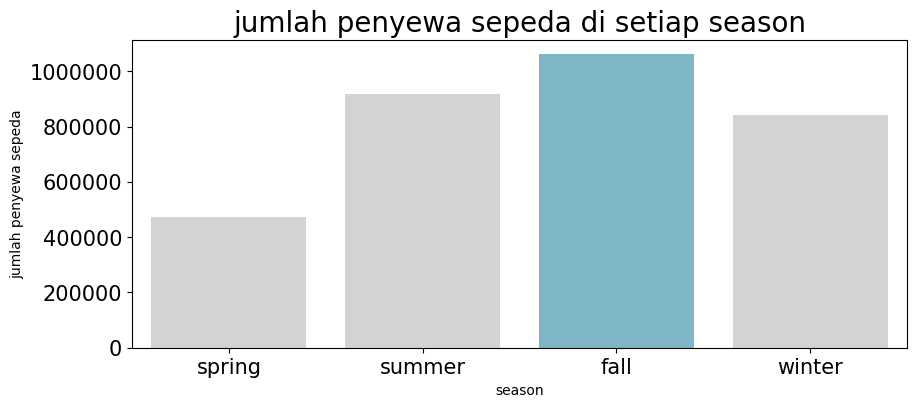

In [27]:
fig, ax = plt.subplots(figsize=(10, 4))
colors = [ "#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3"]
sns.barplot(
    y="count",
    x="season",
    hue="season",
    data=season_count.sort_values(by="season", ascending=False),
    palette=colors,
    ax=ax
)

ax.set_ylabel("jumlah penyewa sepeda", fontsize=10)
ax.set_xlabel("season", fontsize=10)
ax.set_title("jumlah penyewa sepeda di setiap season", loc="center", fontsize=20)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', labelsize=15)

ax.get_yaxis().get_major_formatter().set_scientific(False)

plt.show()


Season yang memiliki penyewa sepeda paling banyak adalah Fall, dengan total penyewaan sepeda sebanyak 1061129. Sedangkan spring menjadi season dengan total penyewa sepeda terrendah, yaitu 471348

### Pertanyaan 2: Pada pukul berapa paling banyak dan paling sedikit terjadi penyewaan sepeda?

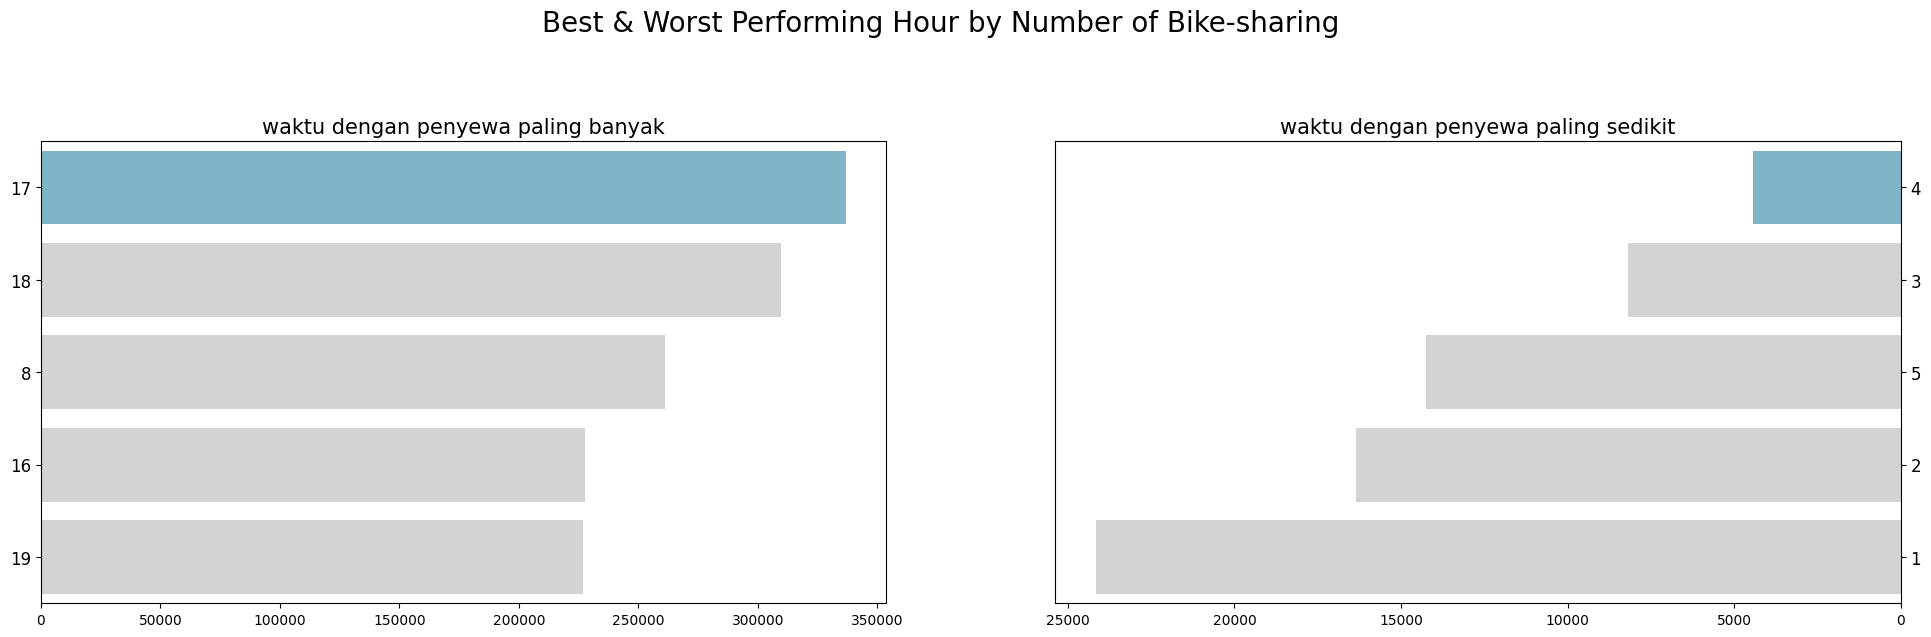

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

hour_count["hour"] = hour_count["hour"].astype(str)

sns.barplot(x="count", y="hour", hue="hour", data=hour_count.head(5), palette=colors, ax=ax[0], orient="h", legend=False)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("waktu dengan penyewa paling banyak", loc="center", fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

sns.barplot(
    x="count",
    y="hour",
    hue="hour",
    data=hour_count.sort_values(by="count", ascending=True).head(5),
    palette=colors,
    ax=ax[1],
    orient="h",
    legend=False
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("waktu dengan penyewa paling sedikit", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best & Worst Performing Hour by Number of Bike-sharing", fontsize=20, y=1.1)
plt.show()

Diketahui bahwa pukul 17 merupakan waktu dengan penyewa sepeda terbanyak, yaitu sebesar 336860, sedangkan pukul 4 pagi merupakan waktu dengan penyewa sepeda paling sedikit, yaitu sebesar 4428

### Pertanyaan 3: Bagaimana perbandingan jumlah penyewaan sepeda pada tahun 2011 dan 2012?

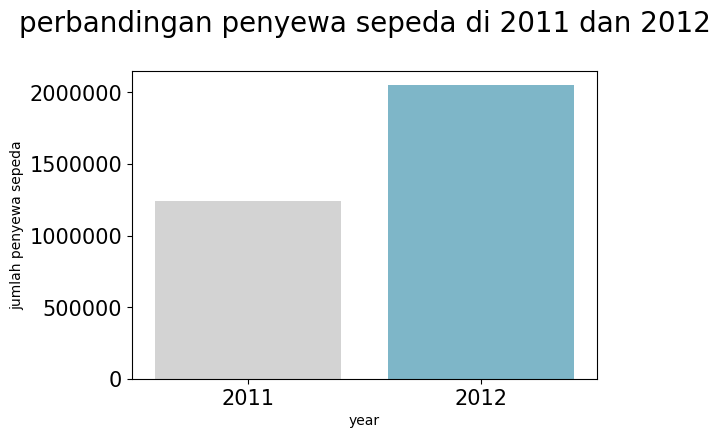

In [38]:
fig, ax = plt.subplots(figsize=(6, 4))
colors = [ "#D3D3D3", "#72BCD4"]
sns.barplot(
    y="count",
    x="year",
    hue="year",
    data=year_count.sort_values(by="year", ascending=False),
    palette=colors,
    ax=ax
)

ax.set_ylabel("jumlah penyewa sepeda", fontsize=10)
ax.set_xlabel("year", fontsize=10)
ax.set_title("perbandingan penyewa sepeda di 2011 dan 2012", loc="center", fontsize=20, y=1.1)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', labelsize=15)

ax.get_yaxis().get_major_formatter().set_scientific(False)

plt.show()

Terdapat peningkatan penyewa sepeda dari tahun 2011 yang awalnya sebanyak 1243103 menjadi 2049576 pada tahun 2012


## Conclusion

- Pada season apa terjadi penyewaan sepeda paling banyak dan paling sedikit?
Berdasarkan hasil yang telah diperoleh, penyewaan sepeda paling banyak terjadi pada musim Fall dengan jumlah sebanyak 1061129, sedangkan untuk penyewaan paling sedikit terjadi pada spring dengan jumlah 471348.
- Pada pukul berapa paling banyak dan paling sedikit terjadi penyewaan sepeda?
Penyewaan sepeda paling banyak terjadi pada pukul 17 atau 5 sore dengan jumlah 336860, sedangkan penyewaan paling sedikit terjadi pada pukul 4 pagi dengan jumlh sebanyak 4428
- Bagaimana perbandingan jumlah penyewaan sepeda pada tahun 2011 dan 2012?
Jumlah penyewaan sepeda pada tahun 2011 terdapat sebanyak 1243103, sedangkan pada 2012 terdapat sebanyak 2049576. Hal ini menunjukkan bahwa terdapat peningkatan yang signifikan terkait penyewaan sepeda.